In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

In [102]:
data=pd.read_csv('car data.csv')
data.shape

(301, 9)

In [103]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [104]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [106]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:xlabel='Year', ylabel='count'>

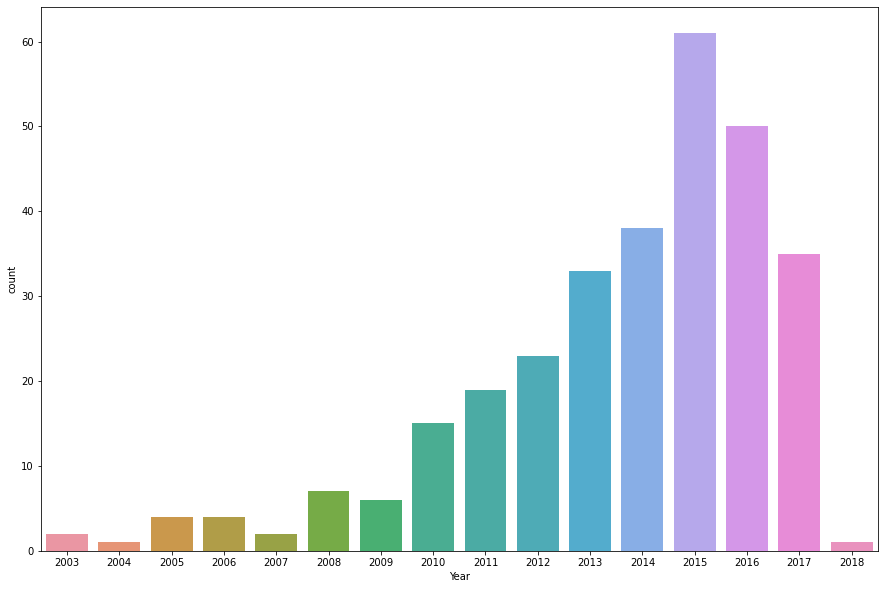

In [107]:
plt.figure(figsize=(15,10))
sns.countplot(data['Year'])

In [108]:
## check the car year sold
data['Vehicle_age']=2021 - data['Year']

<AxesSubplot:xlabel='Vehicle_age', ylabel='count'>

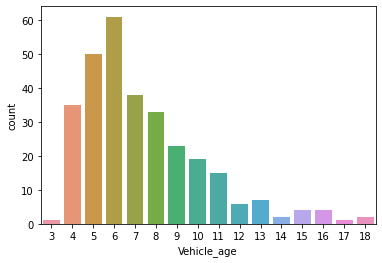

In [109]:
sns.countplot(data['Vehicle_age'])

In [110]:
data.drop('Year', axis=1, inplace=True)

In [111]:
data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


<AxesSubplot:xlabel='Vehicle_age', ylabel='count'>

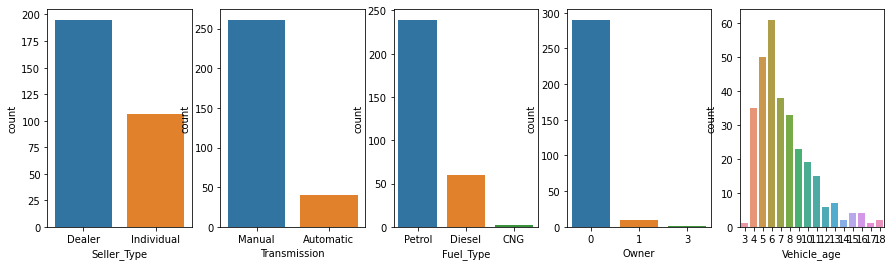

In [112]:
plt.figure(figsize=(15,4))
plt.subplot(1,5,1)
sns.countplot(data['Seller_Type'])

plt.subplot(1,5,2)
sns.countplot(data['Transmission'])

plt.subplot(1,5,3)
sns.countplot(data['Fuel_Type'])

plt.subplot(1,5,4)
sns.countplot(data['Owner'])

plt.subplot(1,5,5)
sns.countplot(data['Vehicle_age'])

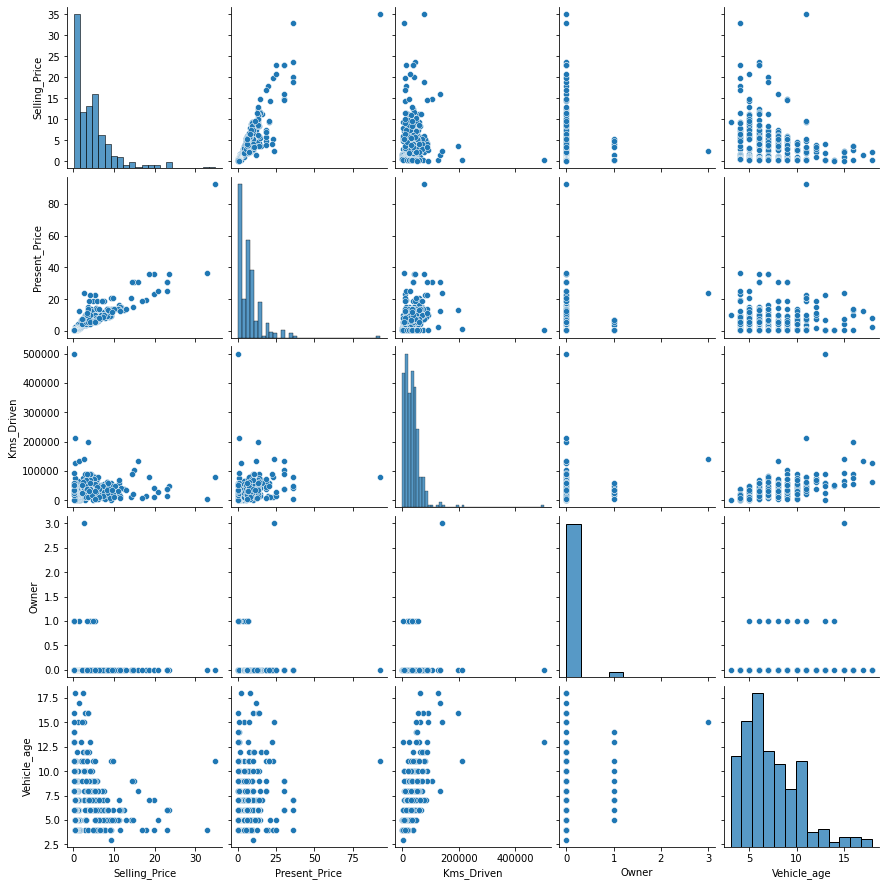

In [113]:
sns.pairplot(data)

<AxesSubplot:xlabel='Vehicle_age'>

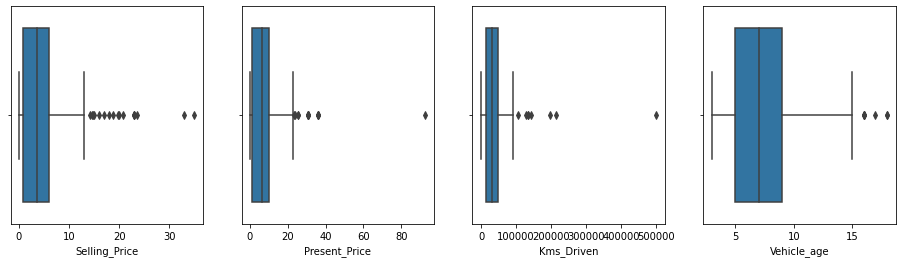

In [114]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
sns.boxplot(data['Selling_Price'])

plt.subplot(1,5,2)
sns.boxplot(data['Present_Price'])

plt.subplot(1,5,3)
sns.boxplot(data['Kms_Driven'])

plt.subplot(1,5,4)
sns.boxplot(data['Vehicle_age'])



In [115]:
## handle the outlier 
def outlier_threshold(data1, feature):
    q1=data1[feature].quantile(0.25)
    q3=data1[feature].quantile(0.75)
    IQR=q3-q1
    lower_limit, upper_limit=q1 - 1.5 * IQR , q3 + 1.5*IQR
    return lower_limit, upper_limit

def has_outlier(data1, feature):
    lower_limit, upper_limit=outlier_threshold(data1, feature)
    if data1[(data1[feature]< lower_limit) | (data1[feature]>upper_limit)].any(axis=None):
        print(feature, 'Yes')
    else:    
        print(feature, 'No')

def replace_with_threshold(data1, num_features):
    for feature in num_features:
        lower_limit, upper_limit=outlier_threshold(data1, feature)
        data.loc[(data[feature]<lower_limit), feature]=lower_limit
        data.loc[(data[feature]>upper_limit), feature]=upper_limit


In [116]:
columns=['Selling_Price','Present_Price','Kms_Driven','Vehicle_age']
for col in columns:
    has_outlier(data, col)

Selling_Price Yes
Present_Price Yes
Kms_Driven Yes
Vehicle_age Yes


In [117]:
replace_with_threshold(data, columns)

In [118]:
for col in columns:
    has_outlier(data, col)

Selling_Price No
Present_Price No
Kms_Driven No
Vehicle_age No


<AxesSubplot:>

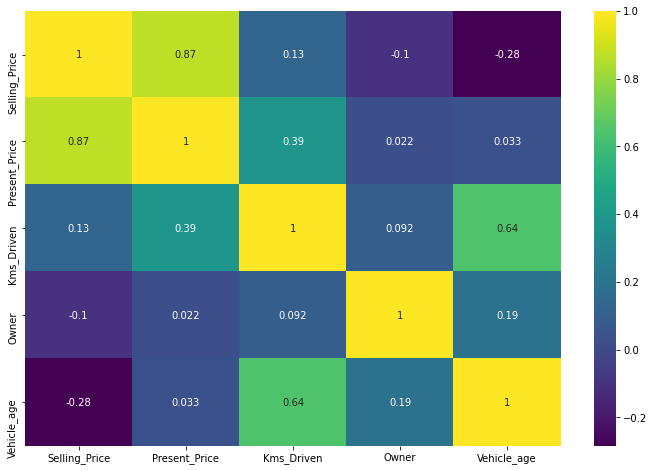

In [119]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

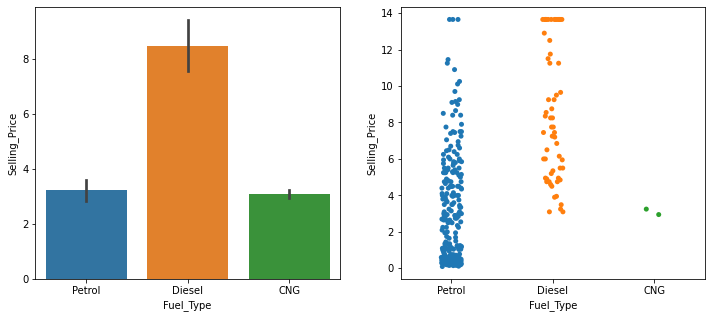

In [120]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=data)

plt.subplot(1,2,2)
sns.stripplot(x='Fuel_Type', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

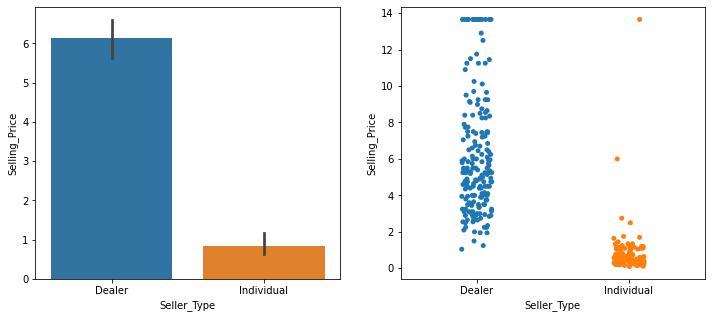

In [121]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Seller_Type', y='Selling_Price', data=data)

plt.subplot(1,2,2)
sns.stripplot(x='Seller_Type', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

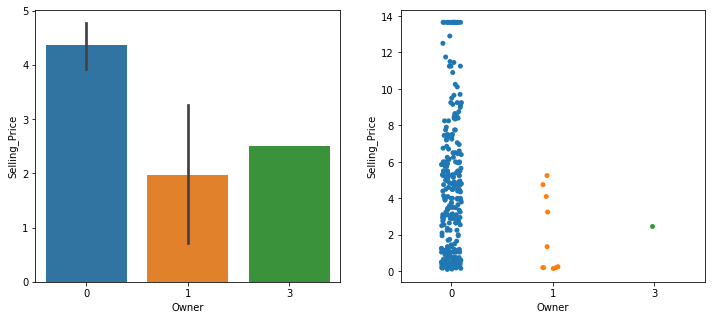

In [122]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Owner', y='Selling_Price', data=data)

plt.subplot(1,2,2)
sns.stripplot(x='Owner', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Vehicle_age', ylabel='Selling_Price'>

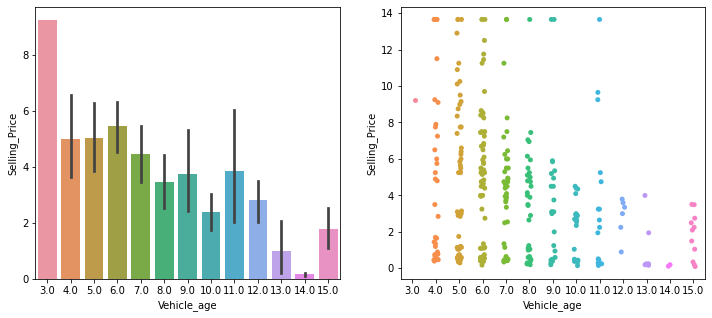

In [123]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Vehicle_age', y='Selling_Price', data=data)

plt.subplot(1,2,2)
sns.stripplot(x='Vehicle_age', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

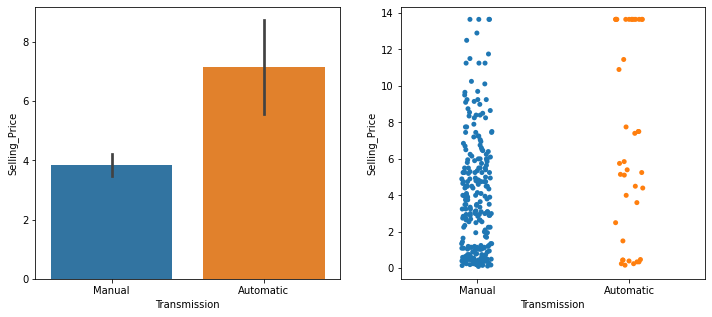

In [124]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Transmission', y='Selling_Price', data=data)

plt.subplot(1,2,2)
sns.stripplot(x='Transmission', y='Selling_Price', data=data)

<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

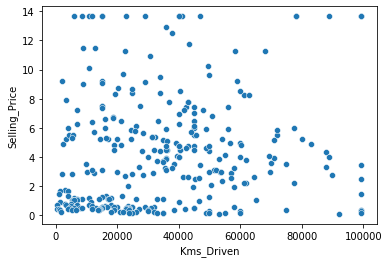

In [125]:
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=data)

In [126]:
## drop the car name
data.drop('Car_Name', axis=1, inplace=True)

In [127]:
## categorical feature
data=pd.get_dummies(data, drop_first=True)

In [128]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0,7.0,0,1,0,1
1,4.75,9.54,43000.0,0,8.0,1,0,0,1
2,7.25,9.85,6900.0,0,4.0,0,1,0,1
3,2.85,4.15,5200.0,0,10.0,0,1,0,1
4,4.60,6.87,42450.0,0,7.0,1,0,0,1


In [129]:
data.iloc[:,0].head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [130]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [131]:
x.shape, y.shape

((301, 8), (301,))

In [132]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x, y)

ExtraTreesRegressor()

In [133]:
print(extra.feature_importances_)

[4.69431428e-01 3.27901836e-02 4.28124499e-04 1.07512250e-01
 5.22627110e-02 2.91272139e-02 2.91823229e-01 1.66248604e-02]


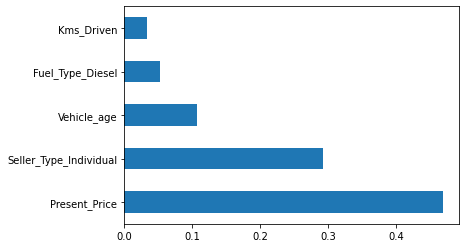

In [134]:
imp=pd.Series(extra.feature_importances_, index=x.columns)
imp.nlargest(5).plot(kind='barh')
plt.show()

## Train test split

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train ,x_test, y_train ,y_test=train_test_split(x, y, test_size=0.30, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((210, 8), (91, 8), (210,), (91,))

In [136]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train ,y_train)

LinearRegression()

In [184]:
y_pred=lr.predict(x_test)
r2_linear=r2_score(y_test, y_pred)
r2_linear

0.8439443574590708

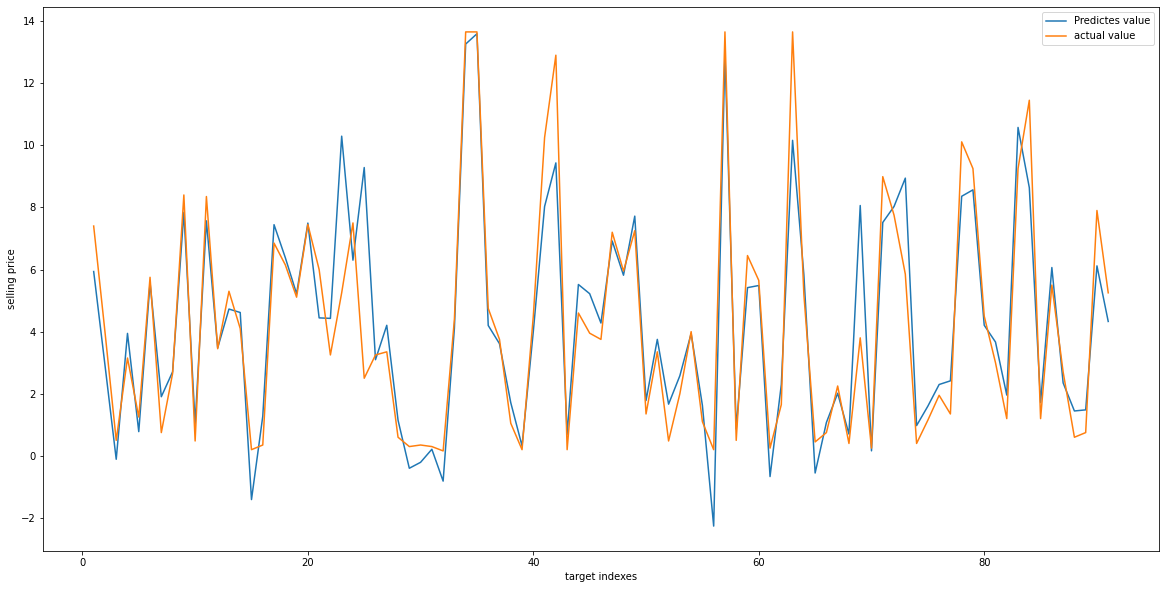

In [138]:
plt.figure(figsize=(20,10))
index=range(1, len(y_pred)+1)
plt.plot(index, y_pred, label='Predictes value')
plt.plot(index, y_test, label='actual value')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

In [140]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train ,y_train)

SVR()

In [141]:
print("training set score : {}".format(svr.score(x_train, y_train)))
print("training set score : {}".format(svr.score(x_test, y_test)))
y_pred1=svr.predict(x_test)

training set score : -0.04205723678590112
training set score : -0.012680024545485002


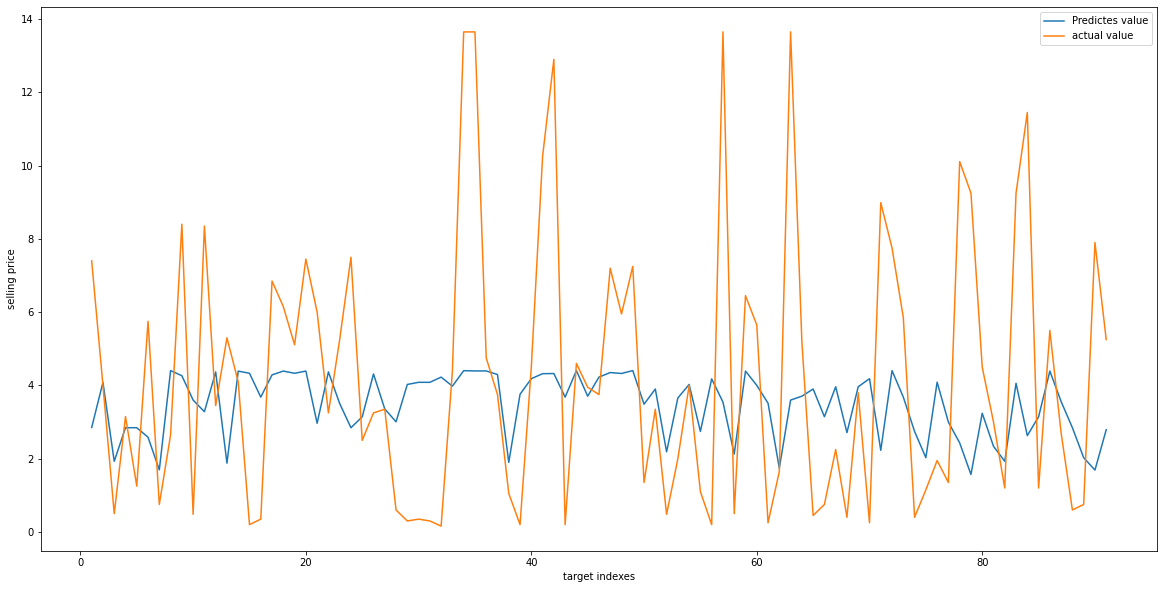

In [142]:
plt.figure(figsize=(20,10))
index=range(1, len(y_pred1)+1)
plt.plot(index, y_pred1, label='Predictes value')
plt.plot(index, y_test, label='actual value')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

In [143]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)


In [185]:
from sklearn.model_selection import GridSearchCV
svr=SVR()
paras={'C':[0.001, 0.1, 1, 2, 5 ,10, 100],
      'degree':[1,2,3,4,5,6,7],
      'gamma':[0.001, 0.1, 1,2 ,5, 10, 100]}

gridsearch=GridSearchCV(estimator=svr,param_grid=paras, cv=10, n_jobs=-1)
gridsearch.fit(x_train_scale,y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 1, 2, 5, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.1, 1, 2, 5, 10, 100]})

In [186]:
gridsearch.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.1}

In [187]:
svr=SVR(C=10, degree=1, gamma=0.1)
svr.fit(x_train_scale ,y_train)
print("training set score : {}".format(svr.score(x_train_scale, y_train)))
print("testing set score : {}".format(svr.score(x_test_scale, y_test)))
y_pred2=svr.predict(x_test_scale)

training set score : 0.9809096204958752
testing set score : 0.9606812120503131


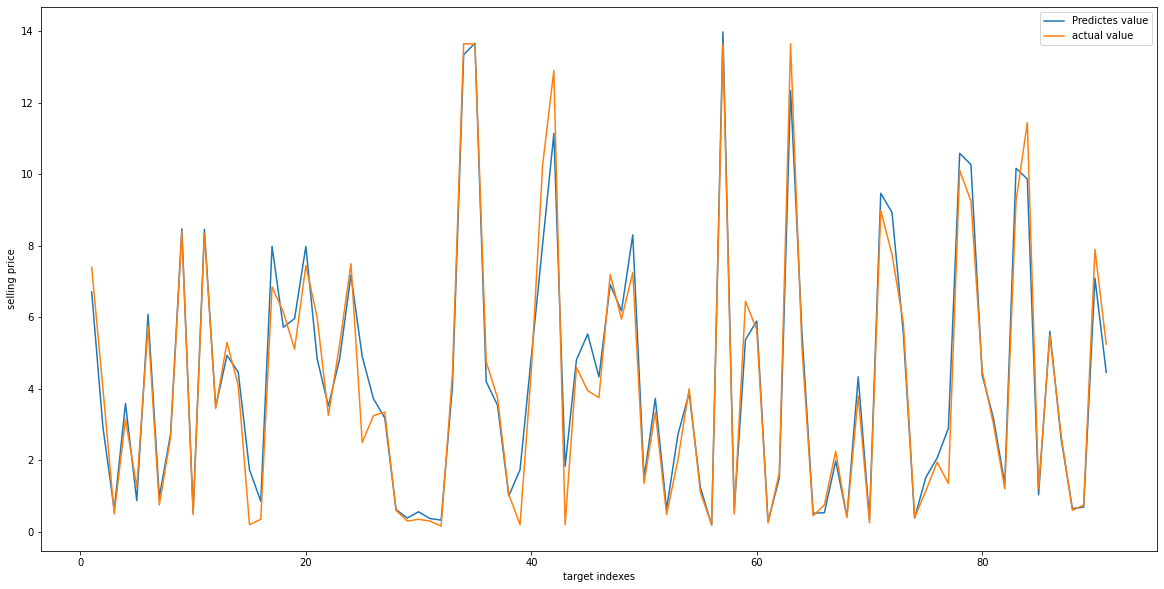

In [182]:
plt.figure(figsize=(20,10))
index=range(1, len(y_pred2)+1)
plt.plot(index, y_pred2, label='Predictes value')
plt.plot(index, y_test, label='actual value')
plt.legend()
plt.xlabel('target indexes')
plt.ylabel('selling price')
plt.show()

In [189]:
from sklearn.metrics import r2_score
r2_svm=r2_score(y_test, y_pred2)
r2_svm

0.9606812120503131

In [147]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[100,200,300,400,500,600,700,800,900,1000,1100,1200]
max_features=['auto','sqrt']
max_depth=[5,10,15,20,25,30]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10,12]

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [151]:
params={'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 
       'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}

grid=RandomizedSearchCV(estimator=rfr, param_distributions=params, cv=10, n_iter=1,verbose=2, 
                        random_state=1, n_jobs=-1)

In [152]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 12],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, verbose=2)

In [153]:
grid.best_params_

{'n_estimators': 600,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 10}

In [154]:
rfr=RandomForestRegressor()

In [155]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=600,min_samples_split= 15,min_samples_leaf= 5,
                        max_features='sqrt',max_depth=10)
rfr.fit(x_train ,y_train)
print("trainin set score",rfr.score(x_train,y_train))
print("testing set score :",rfr.score(x_test, y_test))

trainin set score 0.8653492183297252
testing set score : 0.8799479071555817


In [190]:
y_pred21=rfr.predict(x_test)
r2_random=r2_score(y_test, y_pred21)
r2_random

0.8799479071555817

In [191]:
pd.DataFrame({'Model':['Linear Regression','Support vector machine', 'Random Forest Regressor'], 'R2 Score':[r2_linear, r2_svm,r2_random]})

,Model,R2 Score
0,Linear Regression,0.843944
1,Support vector machine,0.960681
2,Random Forest Regressor,0.879948


In [192]:
## Support vector machine gives the better. Because r2 score is near to zero .R^2 score 
## is used to check the performance ofthe model